In [2]:
from fim import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
[Dataset](https://www.datosabiertos.gob.pe/dataset/reclamos-presentados)

In [3]:
df_reclamos = pd.read_excel("https://www.datosabiertos.gob.pe/sites/default/files/9.1.%20RECLAMOS%20PRESENTADOS_0.xlsx", header=3)
df_reclamos

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,Unnamed: 0,Empresa operadora,Mes,Servicio involucrado,Forma de Presentación,N° de Reclamos Presentados
0,NaN,A & P SERVITEL S.A.C.,2016-01-01,Televisión de Paga,Personal,2.0
1,NaN,A & P SERVITEL S.A.C.,2016-02-01,Televisión de Paga,Personal,1.0
2,NaN,A & P SERVITEL S.A.C.,2016-03-01,Televisión de Paga,Personal,3.0
3,NaN,A & P SERVITEL S.A.C.,2016-01-01,Televisión de Paga,Telefónico,1.0
4,NaN,A & P SERVITEL S.A.C.,2016-02-01,Televisión de Paga,Telefónico,2.0
...,...,...,...,...,...,...
13364,NaN,WINNER SYSTEMS S.A.C.,2021-05-01,Internet,Telefónico,19.0
13365,NaN,WINNER SYSTEMS S.A.C.,2021-06-01,Internet,Telefónico,16.0
13366,NaN,WOW TEL S.A.C.,2021-04-01,Internet,Página web,13.0
13367,NaN,WOW TEL S.A.C.,2021-05-01,Internet,Página web,13.0


## Remove columns

In [4]:
df_reclamos = df_reclamos[['Empresa operadora', 'Servicio involucrado']]
df_reclamos.shape

(13369, 2)

In [5]:
df_reclamos.head()

,Empresa operadora,Servicio involucrado
0,A & P SERVITEL S.A.C.,Televisión de Paga
1,A & P SERVITEL S.A.C.,Televisión de Paga
2,A & P SERVITEL S.A.C.,Televisión de Paga
3,A & P SERVITEL S.A.C.,Televisión de Paga
4,A & P SERVITEL S.A.C.,Televisión de Paga


## Column 'Tipo reclamo'

### Count unique values

In [6]:
print('Existen {} tipos de servicio'.format(len(df_reclamos['Servicio involucrado'].unique())))
print(df_reclamos['Servicio involucrado'].unique())

Existen 8 tipos de servicio
['Televisión de Paga' 'Servicio telefónico fijo local'
 'Servicio telefónico fijo de larga distancia' 'Servicios móviles'
 'Arrendamiento de circuitos' 'Internet' 'Otros' 'Telefonía pública']


## Column 'Empresa operadora'

### Count unique values

In [7]:
print('Existen {} empresas operadoras'.format(len(df_reclamos['Empresa operadora'].unique())))
sorted(df_reclamos['Empresa operadora'].unique())

Existen 138 empresas operadoras


['A & P SERVITEL S.A.C.',
 'AIQUE VARGAS, GERMAN',
 'AMAZONIA T.V. S.R.LTDA ',
 'AMERICA MOVIL PERU S.A.C. ',
 'AMERICATEL PERÚ S.A. ',
 'ANDESAT PERU S.A.C.',
 'ANDRES CULQUI CULQUI ',
 'ANURA PERU S.A.C. ',
 'AT & T GLOBAL NETWORK SERVICES DEL PERU S.R.L.',
 'AXESS NETWORKS SOLUTIONS PERU S.A.C. ',
 'AZTECA COMUNICACIONES PERU S.A.C.',
 'Anibal Estrella Cartagena',
 'Asociación de Cable San Jacinto',
 'Axesat Perú S.A.C. ',
 'BANTEL S.A.C. ',
 'BASILES AREVALO FLORES',
 'BEST CABLE PERU S.A.C. ',
 'BT LATAM PERU S.A.C ',
 'CABLE JAEN S.R.L.',
 'CABLE MAX S.A.C ',
 'CABLE NORTE S.A.C.',
 'CABLE ORIENTE S.A',
 'CABLE PACIFICO S.A.C. ',
 'CABLE PLUS S.A.C',
 'CABLE PUCALLPA S.R.L',
 'CABLE SAUCE TV E.I.R.L. ',
 'CABLE SISTEMAS S.R.L. ',
 'CABLE STAR S.A.C.',
 'CABLE SUR TELECOMUNICACIONES S.A.C. ',
 'CABLE VIDEO PERÚ S.A.C.',
 'CABLE VISIÓN LORETO S.A.C.',
 'CABLENORTV S.A.C.',
 'CABLEVISION S.A.C.',
 'CANTARO TV E.I.R.L. ',
 'CATV SYSTEMS E.I.R.L.',
 'CATV. FULL IMAGEN S.A.C.',
 'CECTE

## Remove duplicates

In [8]:
df_reclamos = df_reclamos.drop_duplicates()

# Transform into transactional dataset

In [9]:
trans = []
for emp in df_reclamos['Empresa operadora'].unique(): #para cada empresa
  #print(emp, df_reclamos[df_reclamos['Empresa operadora'] == emp]['Servicio involucrado'].values)
  trans.append(list(df_reclamos[df_reclamos['Empresa operadora'] == emp]['Servicio involucrado'].values))
print('Hay {} transacciones'.format(len(trans)))

Hay 138 transacciones


In [10]:
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[0], trans[0]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[20], trans[20]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[50], trans[50]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[70], trans[70]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[100], trans[100]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[120], trans[120]))

La empresa A & P SERVITEL S.A.C. tiene reclamos en los servicios ['Televisión de Paga']
La empresa CORPORACION T& E S.R.L. tiene reclamos en los servicios ['Televisión de Paga']
La empresa TELEFÓNICA DEL PERÚ S.A.A.  tiene reclamos en los servicios ['Servicio telefónico fijo local', 'Servicio telefónico fijo de larga distancia', 'Servicios móviles', 'Telefonía pública', 'Arrendamiento de circuitos', 'Televisión de Paga', 'Internet', 'Otros']
La empresa CATV. FULL IMAGEN S.A.C. tiene reclamos en los servicios ['Televisión de Paga']
La empresa COMUNICACIONES J&F CABLE TV S.A.C. tiene reclamos en los servicios ['Televisión de Paga', 'Internet']
La empresa CORPORACIÓN HNOS DJAR S.A.C.  tiene reclamos en los servicios ['Televisión de Paga']


# Mining condensed Representations

In [11]:
#extraer itemsets frecuentes con 1% de soporte mínimo
r = fpgrowth(trans, supp=1)
print(len(r))
r

255


[(('Televisión de Paga',), 95),
 (('Internet', 'Televisión de Paga'), 22),
 (('Internet',), 50),
 (('Servicio telefónico fijo local', 'Televisión de Paga'), 3),
 (('Servicio telefónico fijo local', 'Internet', 'Televisión de Paga'), 3),
 (('Servicio telefónico fijo local', 'Internet'), 13),
 (('Servicio telefónico fijo local',), 15),
 (('Arrendamiento de circuitos', 'Televisión de Paga'), 5),
 (('Arrendamiento de circuitos', 'Internet', 'Televisión de Paga'), 3),
 (('Arrendamiento de circuitos', 'Internet'), 10),
 (('Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Televisión de Paga',
   'Internet'),
  2),
 (('Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Televisión de Paga'),
  2),
 (('Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet'),
  6),
 (('Arrendamiento de circuitos', 'Servicio telefónico fijo local'), 6),
 (('Arrendamiento de circuitos',), 16),
 (('Otros', 'Televisión de Paga'), 3),
 (('Otros', 'Internet', '

In [12]:
#extraer closed itemsets para el soporte mínimo de 1%
r = fpgrowth(trans, target='c', supp=1)
print(len(r))
r

29


[(('Telefonía pública',
   'Servicios móviles',
   'Televisión de Paga',
   'Servicio telefónico fijo de larga distancia',
   'Otros',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  2),
 (('Telefonía pública',
   'Servicios móviles',
   'Servicio telefónico fijo de larga distancia',
   'Otros',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  3),
 (('Telefonía pública',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  4),
 (('Telefonía pública',
   'Servicio telefónico fijo local',
   'Televisión de Paga',
   'Internet'),
  3),
 (('Telefonía pública', 'Servicio telefónico fijo local', 'Internet'), 5),
 (('Telefonía pública',), 7),
 (('Servicios móviles',
   'Servicio telefónico fijo de larga distancia',
   'Arrendamiento de circuitos',
   'Otros',
   'Servicio telefónico fijo local',
   'Internet'),
  4),
 (('Servicios móviles',
   'Servicio telefónico fijo de larga di

In [13]:
#extraer los maximal itemsets para un soporte mínimo de 1%
r = fpgrowth(trans, target='m', supp=1)
print(len(r))
r

1


[(('Telefonía pública',
   'Servicios móviles',
   'Televisión de Paga',
   'Servicio telefónico fijo de larga distancia',
   'Otros',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  2)]

In [14]:
#extraer los free/generatos itemsets para un soporte mínimo 1%
r = fpgrowth(trans, target='g', supp=1)
print(len(r))
r

47


[(('Televisión de Paga',), 95),
 (('Internet', 'Televisión de Paga'), 22),
 (('Internet',), 50),
 (('Servicio telefónico fijo local', 'Televisión de Paga'), 3),
 (('Servicio telefónico fijo local', 'Internet'), 13),
 (('Servicio telefónico fijo local',), 15),
 (('Arrendamiento de circuitos', 'Televisión de Paga'), 5),
 (('Arrendamiento de circuitos', 'Internet', 'Televisión de Paga'), 3),
 (('Arrendamiento de circuitos', 'Internet'), 10),
 (('Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Televisión de Paga'),
  2),
 (('Arrendamiento de circuitos', 'Servicio telefónico fijo local'), 6),
 (('Arrendamiento de circuitos',), 16),
 (('Otros', 'Televisión de Paga'), 3),
 (('Otros', 'Internet'), 9),
 (('Otros', 'Servicio telefónico fijo local', 'Televisión de Paga'), 2),
 (('Otros', 'Servicio telefónico fijo local'), 7),
 (('Otros', 'Arrendamiento de circuitos', 'Televisión de Paga'), 2),
 (('Otros', 'Arrendamiento de circuitos'), 5),
 (('Otros',), 11),
 (('Servicio tel

In [15]:
#closed 
r_c = fpgrowth(trans, target='c', supp=1)
df_c = pd.DataFrame(r_c)
df_c.columns = ['Itemset', 'Freq']
#free/generator
r_f = fpgrowth(trans, target='g', supp=1)
df_f = pd.DataFrame(r_f)
df_f.columns = ['Itemset', 'Freq']

for c in df_c.values:
  for f in df_f.values:
    if set(f[0]).issubset(set(c[0])) and f[1] == c[1]:
      if len(f[0]) != len(c[0]):
        print(f[0], c[0], c[1])

('Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distancia', 'Otros', 'Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet') 2
('Otros', 'Servicio telefónico fijo local', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distancia', 'Otros', 'Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet') 2
('Otros', 'Arrendamiento de circuitos', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distancia', 'Otros', 'Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet') 2
('Servicio telefónico fijo de larga distancia', 'Internet', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distan

## Support

In [16]:
#función para obtener el grupo de transacciones/empresas que soportan cada itemset
def support(x, labels, trans):
  s = [] #inicializar el soporte en vacío
  for t in range(len(trans)): #para cada transacción
    if set(x).issubset(set(trans[t])): #si el itemset x está incluido en la transacción t
      s.append(labels[t])
  return s

In [17]:
pd.set_option('display.max_colwidth', None) #opción para que el dataframe no tenga límite de ancho
labels = list(df_reclamos['Empresa operadora'].unique()) #etiquetas con los nombres de las empresas
df_c['Support'] = [support(x, labels,trans) for x in df_c['Itemset'].values] #crear una columna de support, con los valores de transacciones/empresas que contiene cada itemset
df_c

,Itemset,Freq,Support
0,"(Telefonía pública, Servicios móviles, Televisión de Paga, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",2,"[AMERICA MOVIL PERU S.A.C. , TELEFÓNICA DEL PERÚ S.A.A. ]"
1,"(Telefonía pública, Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",3,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. ]"
2,"(Telefonía pública, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",4,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., GILAT TO HOME PERÚ S.A. , TELEFÓNICA DEL PERÚ S.A.A. ]"
3,"(Telefonía pública, Servicio telefónico fijo local, Televisión de Paga, Internet)",3,"[AMERICA MOVIL PERU S.A.C. , TELEFÓNICA DEL PERÚ S.A.A. , WINNER SYSTEMS S.A.C. ]"
4,"(Telefonía pública, Servicio telefónico fijo local, Internet)",5,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., GILAT TO HOME PERÚ S.A. , TELEFÓNICA DEL PERÚ S.A.A. , WINNER SYSTEMS S.A.C. ]"
5,"(Telefonía pública,)",7,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., GILAT TO HOME PERÚ S.A. , PRISONTEC S.A.C , TELEFÓNICA DEL PERÚ S.A.A. , WINNER SYSTEMS S.A.C. , SERVICIOS GLOBALES DE TELECOMUNICACIONES S.A.C. ]"
6,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Arrendamiento de circuitos, Otros, Servicio telefónico fijo local, Internet)",4,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. ]"
7,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Servicio telefónico fijo local, Internet)",5,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , CONVERGIA PERÚ S.A., ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. ]"
8,"(Servicios móviles, Servicio telefónico fijo local, Internet)",6,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , CONVERGIA PERÚ S.A., ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. , VIETTEL PERU S.A.C.]"
9,"(Servicios móviles,)",9,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , CONVERGIA PERÚ S.A., ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. , VIETTEL PERU S.A.C., INCACEL MOVIL S.A., GUINEA MOBILE S.A.C. , FLASH SERVICIOS PERÚ S.R.L. ]"


In [18]:
pd.set_option('display.max_colwidth', None) #opción para que el dataframe no tenga límite de ancho
labels = [i for i in range(138)]
df_c['Support'] = [support(x, labels,trans) for x in df_c['Itemset'].values] #crear una columna de support, con los valores de transacciones/empresas que contiene cada itemset
df_c

,Itemset,Freq,Support
0,"(Telefonía pública, Servicios móviles, Televisión de Paga, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",2,"[2, 50]"
1,"(Telefonía pública, Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",3,"[2, 25, 50]"
2,"(Telefonía pública, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",4,"[2, 25, 28, 50]"
3,"(Telefonía pública, Servicio telefónico fijo local, Televisión de Paga, Internet)",3,"[2, 50, 63]"
4,"(Telefonía pública, Servicio telefónico fijo local, Internet)",5,"[2, 25, 28, 50, 63]"
5,"(Telefonía pública,)",7,"[2, 25, 28, 43, 50, 63, 90]"
6,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Arrendamiento de circuitos, Otros, Servicio telefónico fijo local, Internet)",4,"[2, 3, 25, 50]"
7,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Servicio telefónico fijo local, Internet)",5,"[2, 3, 19, 25, 50]"
8,"(Servicios móviles, Servicio telefónico fijo local, Internet)",6,"[2, 3, 19, 25, 50, 59]"
9,"(Servicios móviles,)",9,"[2, 3, 19, 25, 50, 59, 72, 126, 130]"


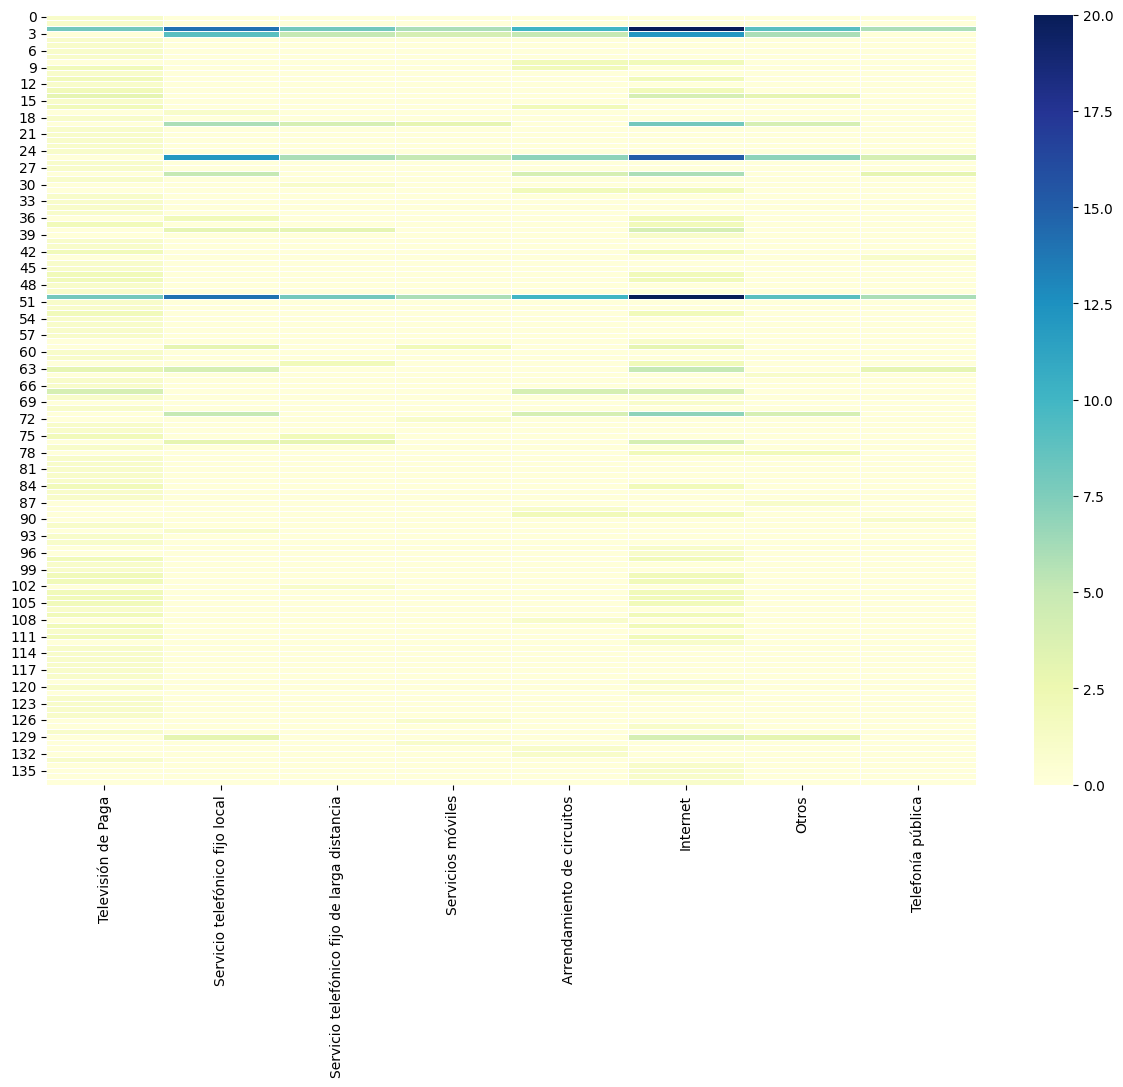

In [19]:
def plot_itemsets(df_, n_trans, n_items):
  a = np.zeros((n_trans, n_items)) #matriz de 0s de transacciones por items
  #print(a)
  items = list(df_reclamos['Servicio involucrado'].unique()) #lista de items/servicios
  for it in range(df_.shape[0]): #para cada itemset
    x = [items.index(i) for i in df_.iloc[it,0]]
    y = [i for i in df_.iloc[it,2]]
    #print(x)
    #print(y)
    for t in y:
      for i in x:
        a[t,i] = a[t,i] + 1
  fig,ax = plt.subplots(figsize=(15,10))
  sns.heatmap(a, linewidth=.5, ax=ax, vmin=0, cmap='YlGnBu', xticklabels=items)

plot_itemsets(df_c, 138, 8)